# Create CSVs from Downloaded SWARM Data

If you need to download SWARM data, follow the steps outlined in this guide: https://app.gitbook.com/o/U9h2Idwc9xoVxGNEIHjA/s/sTPH4yVpXlonfbh9uTja/data-management/aws

In [2]:
import pandas as pd
import json
import glob
import os
import re
import matplotlib.pyplot as plt

# Loading data csvs

In [3]:
#Change the directory to the location of the downloaded csvs
file_list = glob.glob("YOUR_DIRECTORY\\*[!_hash].txt")

In [5]:
def sensor_v(data_str):
    data_obj = data_str.split(",")
    if len(data_obj) < 5:
        return None
    parsed_obj = {
        "index": data_obj[0],
        "timestamp_utc": data_obj[1],
        "battery_v": data_obj[2],
        "proj": data_obj[3],
        "item": data_obj[4]
    }

    s_v = data_obj[5]
    s_v = re.split(r'(?<=[0-9])(?=[+-])', s_v)  

    try:
        parsed_obj['pressure_psi'] = float(s_v[0])
        parsed_obj['temp_C'] = float(s_v[1])
    except (ValueError, IndexError):
        print(f"Skipping packet: {parsed_obj['index']} due to malformed values")
        return None
    return parsed_obj

In [6]:
df = pd.DataFrame()

for file in file_list:
    file_name = os.path.basename(file)

    with open(file, "r") as txt:
        for line in txt:
            data = sensor_v(json.loads(line.strip())['decoded'])
            df = pd.concat([df, pd.DataFrame([data])], ignore_index=True, axis=0)

df = df.dropna(subset=["index"])

if 0 in df.columns:
    df.drop(columns=[0])
    
df['index'] = df['index'].astype(int)
df.set_index("index")
df['timestamp_utc'] = pd.to_datetime(df['timestamp_utc'], unit="s")

Skipping packet: 003716 due to malformed values
Skipping packet: 005885 due to malformed values
Skipping packet: 006529 due to malformed values
Skipping packet: 006731 due to malformed values
Skipping packet: 007146 due to malformed values
Skipping packet: 007276 due to malformed values
Skipping packet: 007834 due to malformed values
Skipping packet: 008800 due to malformed values
Skipping packet: 010012 due to malformed values
Skipping packet: 011185 due to malformed values
Skipping packet: 011644 due to malformed values
Skipping packet: 015022 due to malformed values


C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_24516\3102512038.py:18: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp_utc'] = pd.to_datetime(df['timestamp_utc'], unit="s")


In [7]:
df['level_ft'] = df['pressure_psi'] * 2.30666

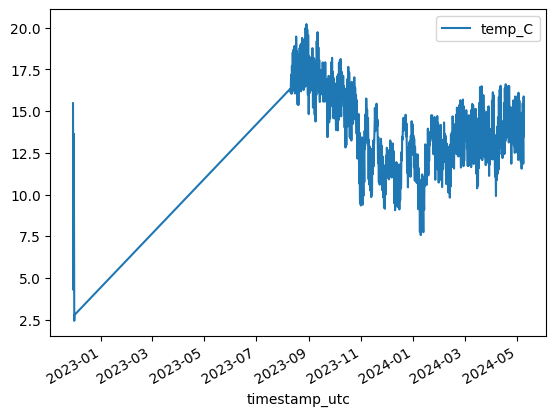

In [8]:
df.loc[df.pressure_psi > 0].plot(x="timestamp_utc", y="temp_C");
plt.show()

In [9]:
df.loc[df.pressure_psi > 0].to_csv("[YOUR WRITE DIRECTORY].csv")